- Objective- 
    1. Analyse the trends and effect of features on casual and registered users.
    2. We have to predict the no of the total users on the basis of given features.

# Importing necessary Libraries

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
import warnings
warnings.filterwarnings('ignore')

# Data loading and statistical Info

In [208]:
bike = pd.read_csv('day.csv', parse_dates=True)
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [209]:
bike.drop('instant', axis=1, inplace=True)

In [210]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [211]:
bike['dteday'] = pd.to_datetime(bike['dteday'])
bike.set_index('dteday', inplace=True)

In [212]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [213]:
bike.isna().sum()     # no missing data for the first time

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Converting the ordinal data into categories

In [214]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [215]:
bike.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [216]:
bike['season']=bike['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [217]:
bike['mnth']=bike['mnth'].replace({1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'Aug',
                                  9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})

In [218]:
bike['weathersit'] = bike['weathersit'].replace({1:'Clear', 2:'Cloudy', 3:'Rain'})

In [219]:
bike['weekday'] = bike['weekday'].replace({0:'Tues', 1:'Wed', 2:'Thurs', 3:'Fri', 4:'Sat', 5:'Sun',6:'Mon'})

In [220]:
bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2018-01-01,spring,0,Jan,0,Mon,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
2018-02-01,spring,0,Jan,0,Tues,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2018-03-01,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
2018-04-01,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
2018-05-01,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
2018-06-01,spring,0,Jan,0,Sat,1,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
2018-07-01,spring,0,Jan,0,Sun,1,Cloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
2018-08-01,spring,0,Jan,0,Mon,0,Cloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
2018-09-01,spring,0,Jan,0,Tues,0,Clear,5.671653,5.80875,43.4167,24.250650,54,768,822


# Objective 1 - EDA for casual and registered users

In [221]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [222]:
continuous = ['temp', 'atemp','hum', 'windspeed']
categorical = ['yr', 'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
Target = ['casual','registered']

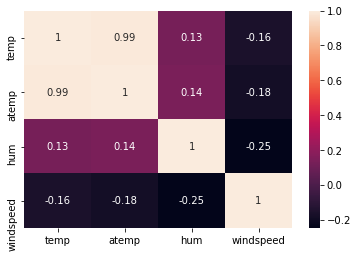

In [223]:
sns.heatmap(bike[continuous].corr(), annot=True)
plt.show()

- as we can see temp and atemp are highly correlated so need to drop one.

In [224]:
bike.drop(['atemp'], axis=1, inplace=True)
continuous.remove('atemp')

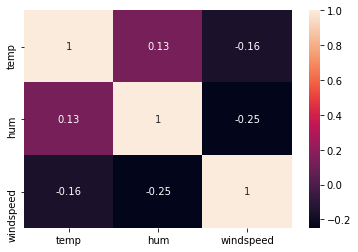

In [225]:
sns.heatmap(bike[continuous].corr(), annot=True)
plt.show()

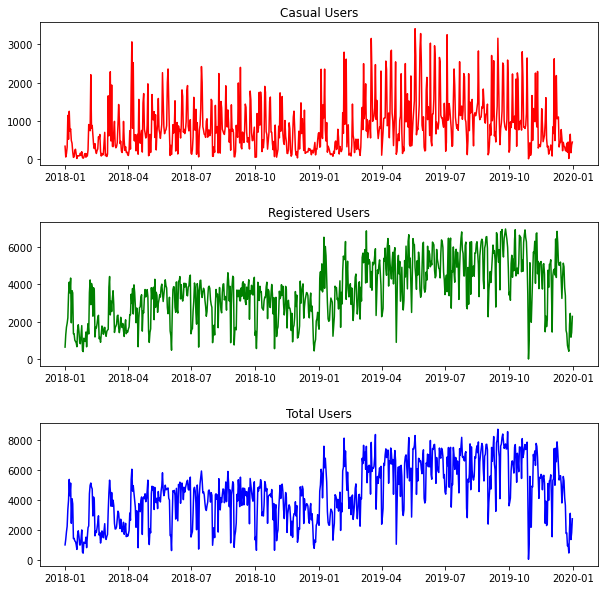

In [226]:
bike.sort_index(inplace=True)
fig, ax = plt.subplots(3,1, figsize=[10,10])
plt.subplots_adjust(hspace=.4)
ax[0].plot(bike['casual'], color ='r')
ax[1].plot(bike['registered'], color = 'g')
ax[2].plot(bike['cnt'], color='b')
ax[0].set_title('Casual Users')
ax[1].set_title('Registered Users')
ax[2].set_title('Total Users')
plt.show()

- Registered users shows significant increase in 2019 while casual users do not.

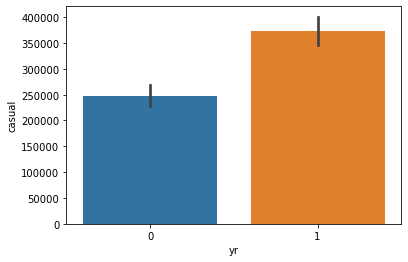

Average Users per day : 
0     677.40274
1    1021.09589
dtype: float64


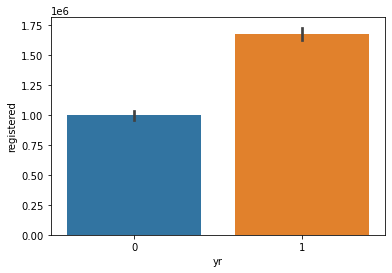

Average Users per day : 
0    2728.358904
1    4589.156164
dtype: float64


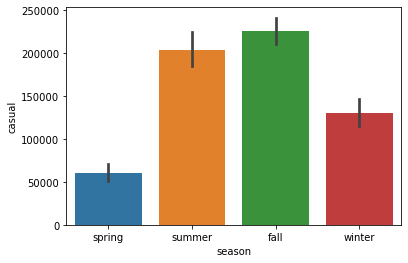

Average Users per day : 
fall      1202.611702
spring     336.427778
summer    1106.097826
winter     729.112360
dtype: float64


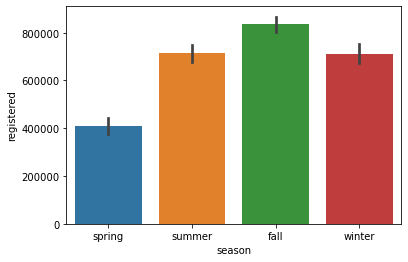

Average Users per day : 
fall      4441.691489
spring    2271.983333
summer    3886.233696
winter    3999.050562
dtype: float64


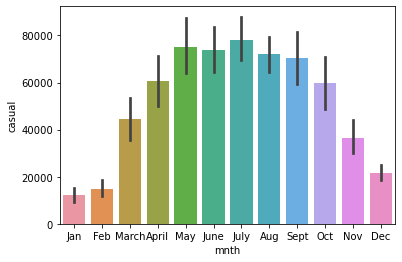

Average Users per day : 
April    1013.366667
Aug      1161.919355
Dec       349.887097
Feb       266.035714
Jan       194.225806
July     1260.596774
June     1231.766667
March     716.838710
May      1214.274194
Nov       610.050000
Oct       963.870968
Sept     1172.050000
dtype: float64


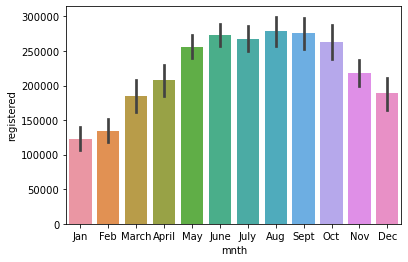

Average Users per day : 
April    3471.533333
Aug      4502.500000
Dec      3053.919355
Feb      2403.928571
Jan      1982.112903
July     4303.080645
June     4540.600000
March    2975.419355
May      4135.500000
Nov      3637.133333
Oct      4235.354839
Sept     4594.466667
dtype: float64


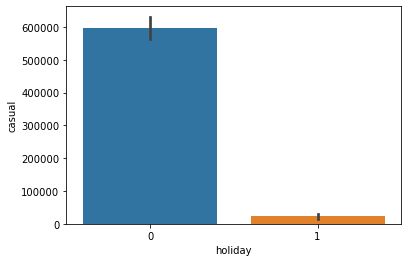

Average Users per day : 
holiday
0     842.867419
1    1064.714286
dtype: float64


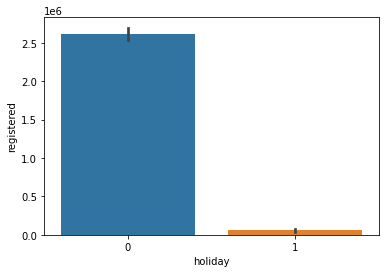

Average Users per day : 
holiday
0    3688.035261
1    2670.285714
dtype: float64


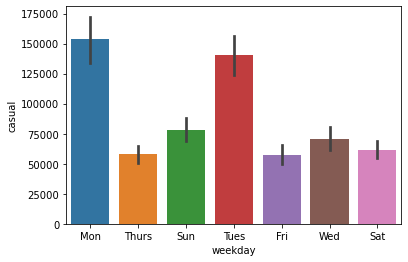

Average Users per day : 
Fri       555.864078
Mon      1465.257143
Sat       590.961538
Sun       752.288462
Thurs     556.182692
Tues     1338.295238
Wed       674.133333
dtype: float64


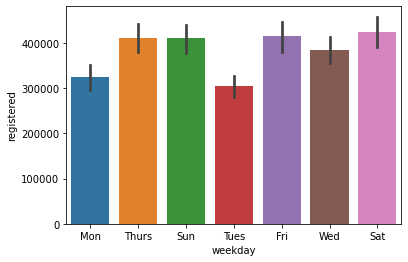

Average Users per day : 
Fri      4019.029126
Mon      3085.285714
Sat      4076.298077
Sun      3938.000000
Thurs    3954.480769
Tues     2890.533333
Wed      3663.990476
dtype: float64


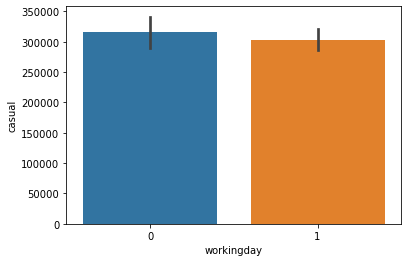

Average Users per day : 
0    1371.134199
1     607.655311
dtype: float64


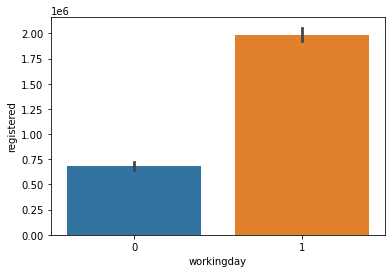

Average Users per day : 
0    2959.034632
1    3982.677355
dtype: float64


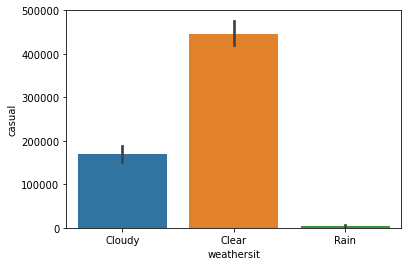

Average Users per day : 
weathersit
Clear     964.030238
Cloudy    689.882114
Rain      185.476190
dtype: float64


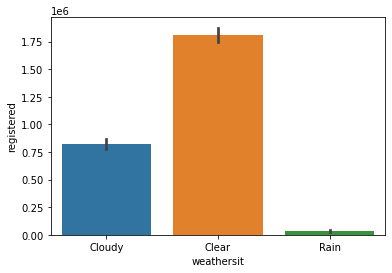

Average Users per day : 
weathersit
Clear     3912.755940
Cloudy    3354.930894
Rain      1617.809524
dtype: float64


In [227]:
for i in categorical:
    for j in Target:
        sns.barplot(x=bike[i], y=bike[j], estimator=sum)
        plt.show()
        print("Average Users per day : ")
        print(bike.groupby(i)[j].sum()/bike[i].value_counts())

- Insights
    1. Growth Rate of casual users over 1st to 2nd year is 50% while for registered users its 65% approx.
    2. Registered Users tend to use the bike service more consistently through evrey month than casual.
    3. During Holidays, avg no of casual users is higher than registered users
    4. Casual users are using bike service majorily on weekends while registered users are using consistently.
    5. For casual users, Bike usage on non-workday is more while for registered users they are using it more on working days
    6. Weather analysis is almost same for both users as bad weather decreasing the no. of users.

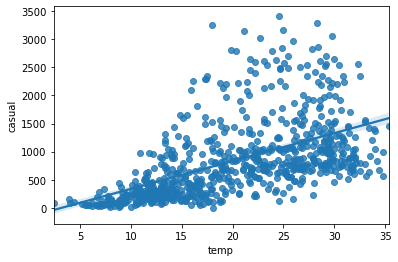

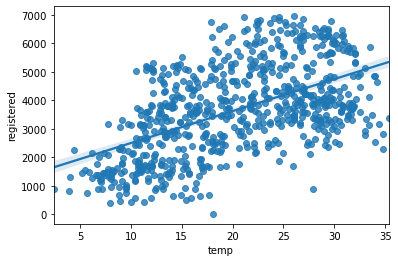

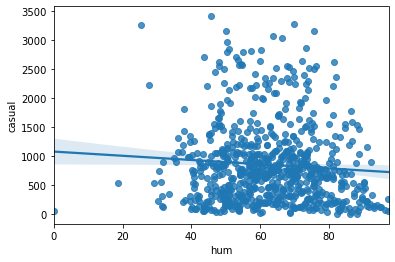

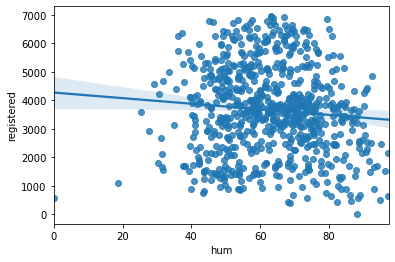

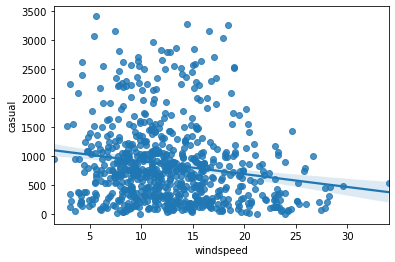

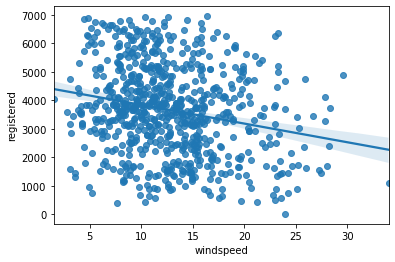

In [228]:
for i in continuous:
    for j in Target:
        sns.regplot(x=i, y=j, data=bike)
        plt.show()

- Insights-
    1. Casual users are avoiding using bike services when temp are low while medium temp shows highest users.
    2. Registered users shows consistent behaviour.
    3. Humidity almost shows no relation with no. of casual and registered users.
    4. There's a slight negative relation with windspeed.

-0.05718748619696058 -1.1183052155760405


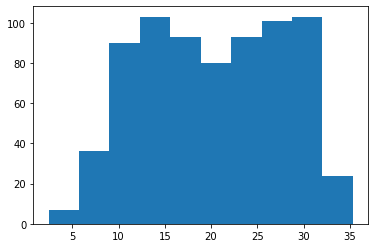

-0.06747586253218237 -0.0598300737984383


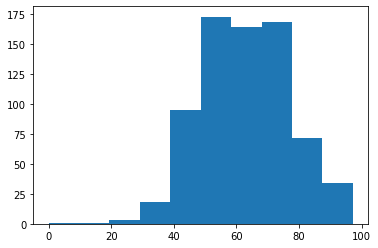

0.6763140387852972 0.4059090481131826


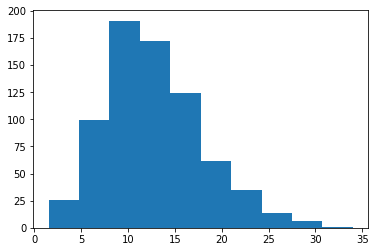

In [229]:
for i in continuous:
    plt.hist(bike[i], )
    print(bike[i].skew(), bike[i].kurtosis())
    plt.show()

- Skewness and Kurtosis are in acceptable range

# Objective - 2 Prediction of total users

### Approach - 1 Directly predicting the total Users

#### Data Transformation, feature Selection and splitting

In [316]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Cloudy,weathersit_Rain
dteday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0,0,0,14.110847,80.5833,10.749882,331,654,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2018-01-02,0,0,1,7.879134,82.9565,3.565271,47,1313,1360,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2018-01-03,0,0,1,10.933347,53.5000,14.500475,137,1714,1851,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2018-01-04,0,0,1,12.300000,68.6250,17.333436,307,1920,2227,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2018-01-05,0,0,0,18.518347,76.2083,7.125718,1138,2213,3351,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [317]:
bike = pd.get_dummies(bike, drop_first=True)

In [318]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Cloudy,weathersit_Rain
dteday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0,0,0,14.110847,80.5833,10.749882,331,654,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2018-01-02,0,0,1,7.879134,82.9565,3.565271,47,1313,1360,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2018-01-03,0,0,1,10.933347,53.5000,14.500475,137,1714,1851,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2018-01-04,0,0,1,12.300000,68.6250,17.333436,307,1920,2227,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2018-01-05,0,0,0,18.518347,76.2083,7.125718,1138,2213,3351,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [319]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tues', 'weekday_Wed', 'weathersit_Cloudy',
       'weathersit_Rain'],
      dtype='object')

In [320]:
X = bike.loc[:,['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed','season_spring', 'season_summer',
              'season_winter','mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
              'mnth_June', 'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
              'mnth_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
              'weekday_Thurs', 'weekday_Tues', 'weekday_Wed', 'weathersit_Cloudy',
              'weathersit_Rain']]
y = bike['cnt']

In [321]:
bike.shape

(730, 31)

In [322]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size=.3, random_state=0)
scale = StandardScaler()
rfe = RFE(n_features_to_select=20,estimator=reg )
x_train[['yr', 'holiday', 'workingday', 'temp', 'hum',
         'windspeed']] = scale.fit_transform(x_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed']])
x_test[['yr', 'holiday', 'workingday', 'temp', 
        'hum', 'windspeed']] = scale.transform(x_test[['yr', 'holiday','workingday', 'temp', 'hum', 'windspeed']])

In [323]:
x_train

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_Cloudy,weathersit_Rain
dteday,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-08-24,-1.001959,-0.179787,0.659843,0.971500,-0.133491,0.831047,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-06-09,0.998045,-0.179787,0.659843,1.096649,1.301153,-0.606969,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2018-01-13,-1.001959,-0.179787,0.659843,-1.754879,-1.073426,1.453247,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2018-06-11,-1.001959,-0.179787,-1.515511,-0.771596,0.771524,-1.261321,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2019-07-11,0.998045,-0.179787,0.659843,-1.053173,-0.535074,1.493625,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2019-05-18,0.998045,-0.179787,0.659843,0.386002,-0.703858,-0.679775,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2019-04-19,0.998045,-0.179787,0.659843,0.032910,-0.081111,-1.600730,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2019-12-24,0.998045,-0.179787,0.659843,-1.399266,1.167667,-1.453908,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2019-05-17,0.998045,-0.179787,0.659843,0.542430,-0.727136,0.524013,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [324]:
feature_selected = rfe.fit(x_train, y_train)

In [325]:
feature_selected.support_, feature_selected.ranking_

(array([ True, False,  True,  True,  True,  True,  True, False,  True,
        False,  True,  True,  True,  True, False, False,  True,  True,
         True,  True,  True, False, False, False,  True,  True,  True,
         True]),
 array([1, 5, 1, 1, 1, 1, 1, 8, 1, 2, 1, 1, 1, 1, 3, 9, 1, 1, 1, 1, 1, 7,
        6, 4, 1, 1, 1, 1]))

In [326]:
list(zip(x_train.columns,rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 5),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 2),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 3),
 ('mnth_March', False, 9),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 7),
 ('weekday_Sun', False, 6),
 ('weekday_Thurs', False, 4),
 ('weekday_Tues', True, 1),
 ('weekday_Wed', True, 1),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Rain', True, 1)]

In [327]:
col = x_train.columns[rfe.support_]

In [328]:
x_train = x_train[col]

In [329]:
x_train.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Tues', 'weekday_Wed', 'weathersit_Cloudy', 'weathersit_Rain'],
      dtype='object')

In [342]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
vif = pd.DataFrame()
vif['Features'] =  x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'])
vif = vif.sort_values('VIF',ascending = False)
vif

,Features,VIF
5,season_spring,4.0
2,temp,3.0
9,mnth_Jan,3.0
8,mnth_Feb,2.0
12,mnth_Nov,2.0
3,hum,2.0
15,weathersit_Cloudy,2.0
6,season_winter,2.0
7,mnth_Dec,2.0
1,workingday,2.0


In [343]:
import statsmodels.api as sm
x1 = sm.add_constant(x_train)
model1  = sm.OLS(y_train.values.reshape(-1,1), x1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     147.3
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          1.08e-180
Time:                        19:05:51   Log-Likelihood:                -4131.0
No. Observations:                 511   AIC:                             8298.
Df Residuals:                     493   BIC:                             8374.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4845.2996     88.214     54.927      0.000    4671.978    5018.621
yr                  996.7650     36.277     27.476      0.000     925.488    1068.042
workingday          168.6196     44.711      3.771      0.000      80.772     256.468
temp                778.5905     69.354     11.226      0.000     642.325     914.856
hum                -222.6327     48.710     -4.571      0.000    -318.338    -126.928
windspeed          -227.1110     38.483     -5.902      0.000    -302.722    -151.500
season_spring      -789.4402    169.159     -4.667      0.000   -1121.801    -457.079
season_winter       645.1253    127.885      5.045      0.000     393.859     896.391
mnth_Dec           -580.4960    158.775     -3.656      0.000    -892.455    -268.537
mnth_Feb           -449.1137    191.911     -2.340      0.020    -826.178     -72.049
mnth_Jan           -673.9907    196.093     -3.437      0.001   -1059.271    -288.710
mnth_July          -559.6192    154.734     -3.617      0.000    -863.639    -255.599
mnth_May            286.2092    142.605      2.007      0.045       6.021     566.397
mnth_Nov           -762.4030    172.700     -4.415      0.000   -1101.722    -423.084
mnth_Sept           536.2646    140.812      3.808      0.000     259.599     812.930
weekday_Mon         405.7356    130.109      3.118      0.002     150.100     661.371
weathersit_Cloudy  -388.4794     92.886     -4.182      0.000    -570.981    -205.978
weathersit_Rain   -2002.8946    237.612     -8.429      0.000   -2469.752   -1536.038
==============================================================================
Omnibus:                       86.857   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.245
Skew:                          -0.831   Prob(JB):                     3.04e-52
Kurtosis:                       5.895   Cond. No.                         9.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [334]:
x_train.drop(['mnth_Oct'], axis=1,inplace=True)

In [338]:
x_train.drop('weekday_Tues', axis=1, inplace=True)

In [341]:
x_train.drop('weekday_Wed', axis=1, inplace=True)

In [344]:
reg.fit(x_train, y_train)

LinearRegression()

In [345]:
x_test = x_test[x_train.columns] 

In [351]:
y_predict_test = reg.predict(x_test)

In [352]:
y_predict_train = reg.predict(x_train)

In [353]:
from sklearn.metrics import r2_score

In [355]:
score_test = r2_score(y_test, y_predict_test)
score_train = r2_score(y_train, y_predict_train)

In [356]:
score_test, score_train

(0.865441235365265, 0.8355213865362195)

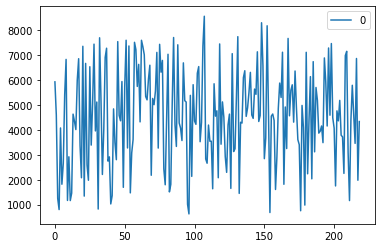

In [397]:
pd.DataFrame(y_test.values).plot()

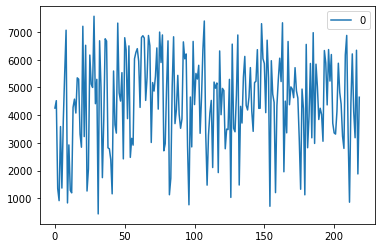

In [398]:
pd.DataFrame(y_predict_test).plot()

In [379]:
result = pd.DataFrame(data=[y_test.values, y_predict_test]).T

In [381]:
result.columns = ['Test Data', 'Test Prediction']

In [382]:
result

,Test Data,Test Prediction
0,5923.0,4253.397485
1,4592.0,4520.925779
2,1248.0,1350.797041
3,801.0,914.444358
4,4075.0,3586.199981
5,1817.0,1368.036359
6,2659.0,3802.791605
7,5409.0,5502.537261
8,6824.0,7062.999583
9,1167.0,831.883568


In [396]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, y_predict_test)

0.04788590435725068

Error and predictions are good. Since we have to use multiple linear regression only, some ensemble models might give better results in range of 90%+ r_2 score

Conclusions- 
    1. r_score = 86.5
    2. Log_rmse = 0.04

-- End of project